<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/clustering/GMM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
X_train = np.load('/content/drive/MyDrive/pytorch_practice/data.npy')

In [ ]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X_train)



GaussianMixture(n_components=5)

In [ ]:
print(gmm.means_) #평균


[[2.83889816 2.81830234]
 [0.70775519 1.82566557]
 [3.82998844 3.72361538]
 [2.22879915 0.72473381]
 [1.71244823 1.98098593]]


In [ ]:

print(gmm.covariances_) #공분산

[[[ 0.27664168 -0.13619136]
  [-0.13619136  0.50470205]]

 [[ 0.26687691 -0.24326417]
  [-0.24326417  0.62752835]]

 [[ 0.34150265  0.16255351]
  [ 0.16255351  0.4113367 ]]

 [[ 0.43548993 -0.26890061]
  [-0.26890061  0.38852669]]

 [[ 0.1371117  -0.06637351]
  [-0.06637351  0.49883735]]]


In [ ]:
X, Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))



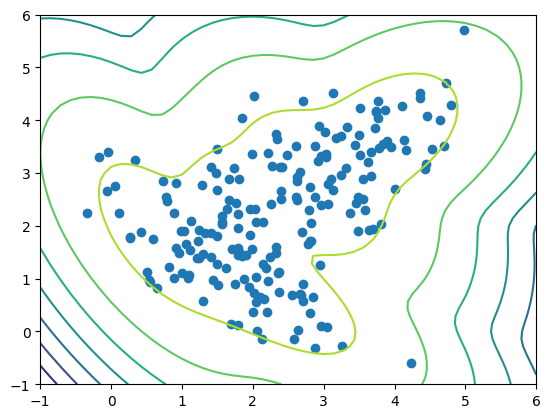

In [ ]:
plt.contour(X,Y,Z)
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  .fit(X)


Text(0.5, 0, 'n_components')

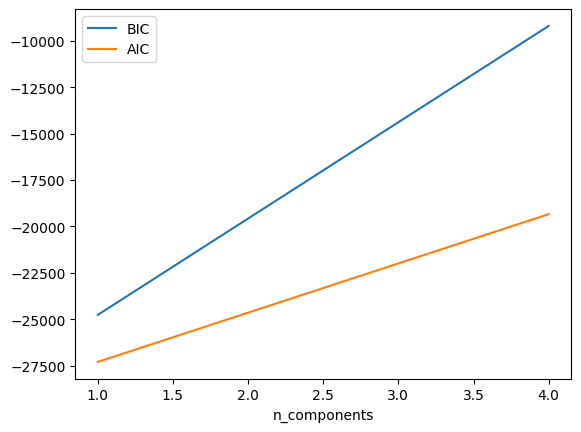

In [ ]:
#aic & bic
n_components = np.arange(1,5) #1~21 까지 군집개수
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components] #군집개수에 따라 모델 학습시켜 봄

#aic, bic 적용해보고 결과출력
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')

plt.legend(loc='best')
plt.xlabel('n_components')